# Signaling Game Simulation Plots

## Requirements

In [234]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import *

import simulations
import plots

## Load a simulation

In [235]:
simulation_name = "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1"

In [236]:
simulation = simulations.load_simulation(simulation_name)
evaluations = simulation.evaluations

In [237]:
print(simulation.name)
print(f"Simulation message sizes: {list(evaluations.keys())}")
print(f"Number of trials per evaluation: {len(evaluations[2])}")

extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1
Simulation message sizes: [2]
Number of trials per evaluation: 20


## Available simulations

In [266]:
simulation_display_name_to_file_name = {
    "Shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
    "Shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0"
} 

## Available evaluations

In [239]:
print("Available evaluations:\n\t{}".format('\n\t'.join(evaluations[2][0].keys())))

Available evaluations:
	training_losses
	object_prediction_accuracy
	object_prediction_by_cluster_loss
	clusterization_f_score
	predictions_by_average_msg_loss
	predictions_by_average_msg_accuracy
	addition_compositionality_mean_message_loss
	addition_compositionality_mean_message_cluster_accuracy
	addition_compositionality_mean_production_loss
	addition_compositionality_mean_production_accuracy
	analogy_compositionality_net_message_mean_loss
	analogy_compositionality_net_message_cluster_mean_accuracy
	analogy_compositionality_net_prediction_mean_loss
	analogy_compositionality_net_prediction_mean_accuracy
	compositionality_net_message_mean_loss
	compositionality_net_message_cluster_mean_accuracy
	compositionality_net_prediction_mean_loss
	compositionality_net_prediction_mean_accuracy
	functions_from_messages
	min_max_from_messages
	dimension_from_messages
	sanity_from_messages
	object_by_context_from_messages
	object_by_decoder_context_from_messages
	context_from_messages
	decoder_cont

## Helper functions

In [240]:
def get_evaluation_mean_and_err(simulation_name, evaluation_name, message_size) -> float:
    simulation = simulations.load_simulation(simulation_name)
    vals = []
    for trial in simulation.evaluations[message_size]:
        vals.append(trial[evaluation_name])
    return np.mean(vals), np.std(vals)

## Predictions from M

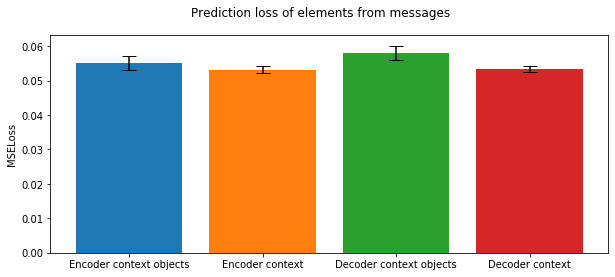

In [241]:
simulation_name = "Non-shared context"
simulation_file_name = simulation_name_to_file_name[simulation_name]

msg_size = 2
evaluations_to_display_name = {
    "object_by_context_from_messages": "Encoder context objects", 
    "context_from_messages": "Encoder context", 
    "object_by_decoder_context_from_messages": "Decoder context objects", 
    "decoder_context_from_messages": "Decoder context"
}

mean_err_per_eval = {display_name: get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size) for eval_name, display_name in evaluations_to_display_name.items()}

fig, ax = plt.subplots(1, figsize=(10,4))

for i, (mean, err) in enumerate(mean_err_per_eval.values()):
    ax.bar(i, mean, yerr=err, capsize=7, color=f"C{i}")

ax.set_xticks(range(len(mean_err_per_eval)))
ax.set_xticklabels(mean_err_per_eval.keys())
ax.set_ylabel('MSELoss')
fig.suptitle('Prediction loss of elements from messages')
plt.show()


### Prediction of F from M

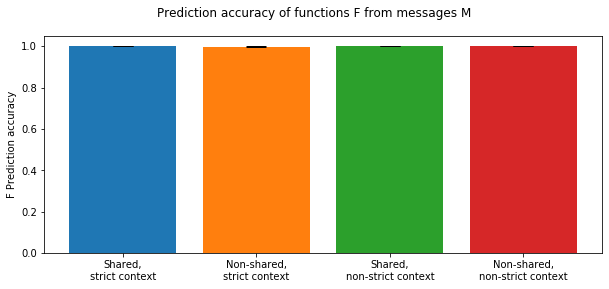

In [267]:
evaluation_name = "functions_from_messages"
label = "F Prediction accuracy"

#TODO use same context size for non-strict context
simulation_display_name_to_file_name = {
    "Shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
    "Shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0"
} 

msg_size = 2

fig, ax = plt.subplots(1, figsize=(10,4))
bar_width = 1

for s, (display_name, file_name) in enumerate(simulation_display_name_to_file_name.items()):
    mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
    ax.bar(s, mean, yerr=err, capsize=10, color=f"C{s}", label="display_name")
    
ax.set_xticks(range(len(simulation_display_name_to_file_name)))
ax.set_xticklabels(simulation_display_name_to_file_name.keys())
ax.set_ylabel(label)
fig.suptitle('Prediction accuracy of functions F from messages M')
plt.show()


## Training losses

### Shared vs. Non-shared

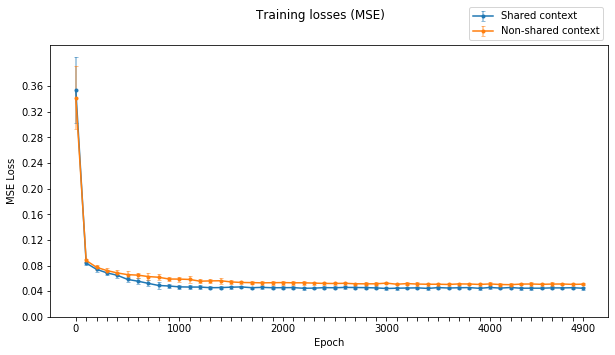

In [269]:
simulation_display_name_to_file_name = {
    "Shared context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### First 50 epochs

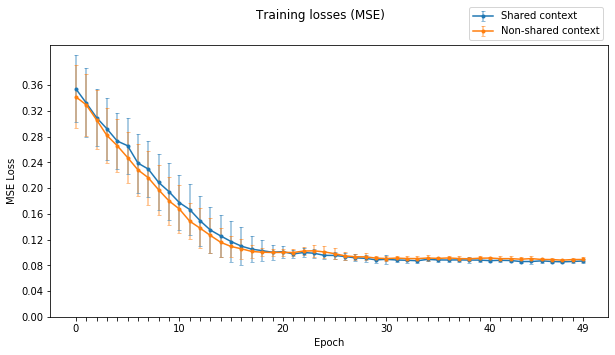

In [274]:
plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=50, epoch_interval=1, label_interval=10)

### Strict vs. Non-strict (TODO: use same # of objects)

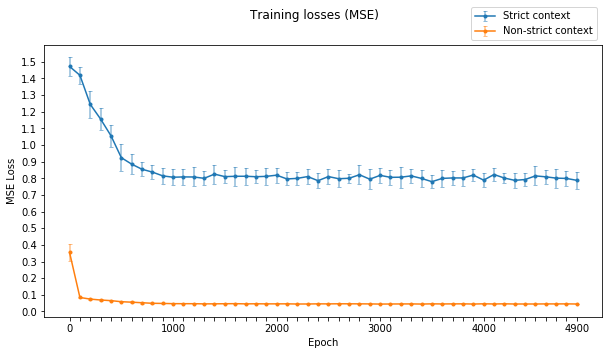

In [244]:
simulation_display_name_to_file_name = {
    "Strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-strict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

## Clustering

### Cluster-function F1-score

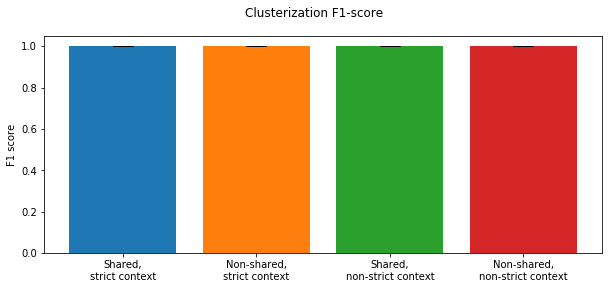

In [276]:
simulation_display_name_to_file_name = {
    "Shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
    "Shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0"
} 

evaluation_name = "clusterization_f_score"
msg_size = 2

fig, ax = plt.subplots(1, figsize=(10,4))
bar_width = 1

for s, (display_name, file_name) in enumerate(simulation_display_name_to_file_name.items()):
    mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
    ax.bar(s, mean, yerr=err, capsize=10, color=f"C{s}", label="display_name")
    
ax.set_xticks(range(len(simulation_display_name_to_file_name)))
ax.set_xticklabels(simulation_display_name_to_file_name.keys())
ax.set_ylabel("F1 score")
fig.suptitle('Clusterization F1-score')
plt.show()

### Prediction by cluster average message

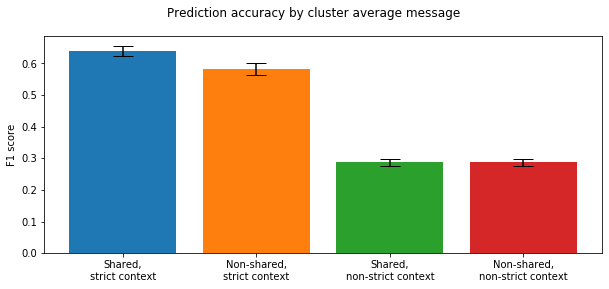

In [277]:
simulation_display_name_to_file_name = {
    "Shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared,\nstrict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
    "Shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-shared,\nnon-strict context": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0"
} 

evaluation_name = "predictions_by_average_msg_accuracy"
msg_size = 2

fig, ax = plt.subplots(1, figsize=(10,4))
bar_width = 1

for s, (display_name, file_name) in enumerate(simulation_display_name_to_file_name.items()):
    mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
    ax.bar(s, mean, yerr=err, capsize=10, color=f"C{s}", label="display_name")
    
ax.set_xticks(range(len(simulation_display_name_to_file_name)))
ax.set_xticklabels(simulation_display_name_to_file_name.keys())
ax.set_ylabel("F1 score")
fig.suptitle('Prediction accuracy by cluster average message')
plt.show()

## Compositionality
(need to think how to plot, losses are on different scales for M/O)

### Message inference using addition 

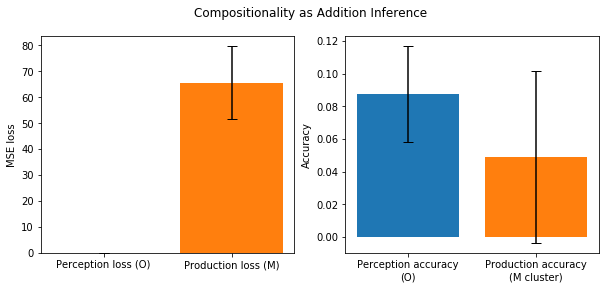

In [265]:

simulation_name = "Shared, strict context"
simulation_file_name = "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "addition_compositionality_mean_production_loss",
    "Production loss (M)": "addition_compositionality_mean_message_loss",
}
accuracy_evals = {
    "Perception accuracy\n(O)": "addition_compositionality_mean_production_accuracy",
    "Production accuracy\n(M cluster)": "addition_compositionality_mean_message_cluster_accuracy",
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Compositionality as Addition Inference')
plt.show()


### Message inference using Analogy Network

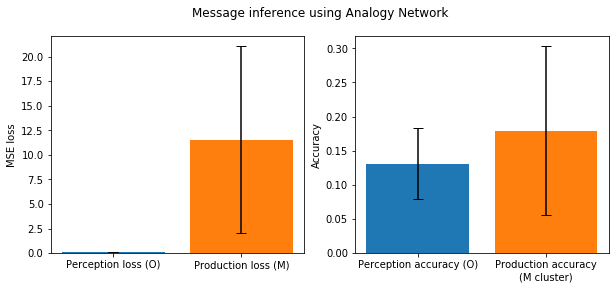

In [264]:
simulation_name = "Shared, strict context"
simulation_file_name = "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "analogy_compositionality_net_prediction_mean_loss",
    "Production loss (M)": "analogy_compositionality_net_message_mean_loss"
}
accuracy_evals = {
    "Perception accuracy (O)": "analogy_compositionality_net_prediction_mean_accuracy",
    "Production accuracy\n(M cluster)": "analogy_compositionality_net_message_cluster_mean_accuracy"
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Message inference using Analogy Network')
plt.show()

### Message inference using Compositionality Network (argmin_k from argmax_k)

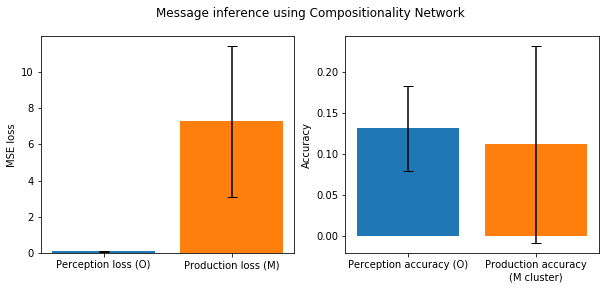

In [247]:
simulation_name = "Shared, strict context"
simulation_file_name = "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "compositionality_net_prediction_mean_loss",
    "Production loss (M)": "compositionality_net_message_mean_loss"
}
accuracy_evals = {
    "Perception accuracy (O)": "analogy_compositionality_net_prediction_mean_accuracy",
    "Production accuracy\n(M cluster)": "compositionality_net_message_cluster_mean_accuracy"
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, msg_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Message inference using Compositionality Network')
plt.show()